<a href="https://colab.research.google.com/github/danaigkritz/MLF/blob/main/lab_25_Feb_(lab4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA through Singular Value Decomposition

In [1]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R=np.matmul(X,X.T)/3
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
print(U)
u1=U[:,0] # new basis vectors
u2=U[:,1]
print(u1)
print(u2)

# Calculate the coordinates in new orthonormal basis:
Xi1=np.matmul(np.transpose(X),u1)
Xi2=np.matmul(np.transpose(X),u2)
# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it

Xaprox=np.matmul(u1[:,None],Xi1[None,:])
print(Xaprox)
# Check that you got the original


[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[-0.40455358 -0.9145143 ]
[-0.9145143   0.40455358]
[[1.80720735 1.27357371 0.        ]
 [4.08528566 2.87897923 0.        ]]


# PCA on Iris data

In [3]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

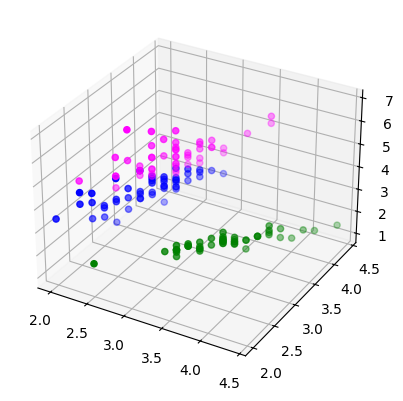

In [4]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


array([2.93808505, 0.9201649 , 0.14774182])

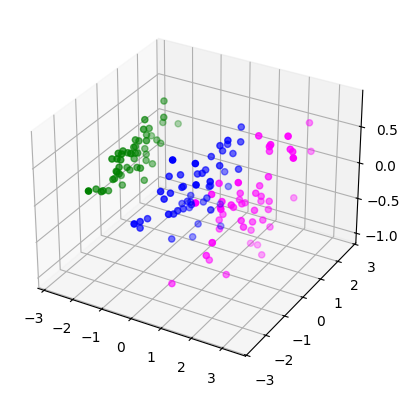

In [5]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

from sklearn import decomposition
#define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
#you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show
pca.explained_variance_

# axes2=plt.axes(projection='3d')
# axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
# axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
# axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
# plt.show


In [6]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [7]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

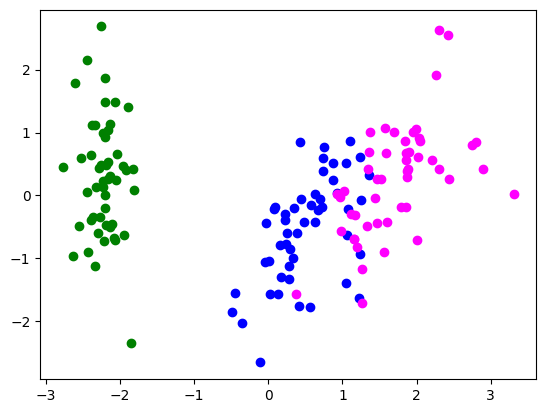

In [8]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,0],Xpca[y==0,1], color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='magenta')

# KNN classifier

(105, 4)
(45, 4)
[[17  1  0]
 [ 0 16  1]
 [ 0  0 10]]


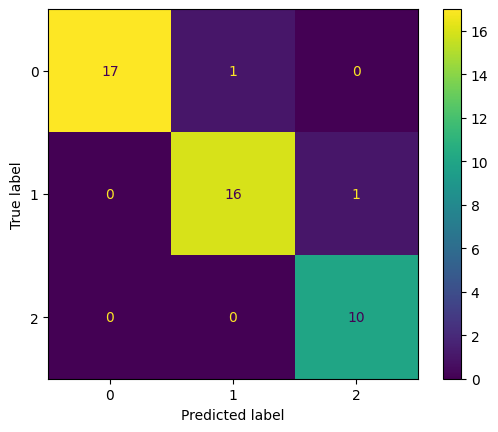

In [10]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpp,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

#do the same for KNN(Xpp), KNN(Xpca), KNN(Xpca(0+1)), KNN(Xpca(1+2))
#το τελευταίο είναι επίτηδες λάθος διάσταση
#το 0 και το 1 ίσως θέλει να το κάνω ξεχωριστά

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
#confusion_matrix(,)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



(105, 3)
(45, 3)
[[16  0  0]
 [ 0 14  0]
 [ 0  2 13]]


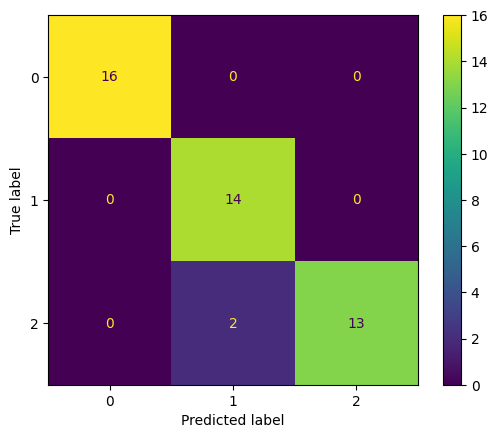

In [17]:
#homework
#KNN(Xpca)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
#confusion_matrix(,)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)


(105, 2)
(45, 2)
[[13  0  0]
 [ 0 11  1]
 [ 0  6 14]]


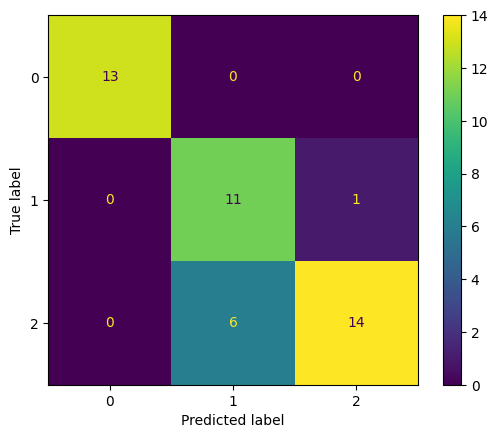

In [18]:
#homework
#KNN(Xpca(0+1))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca[:, :2],y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
#confusion_matrix(,)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

(105, 2)
(45, 2)
[[11  3  1]
 [ 5  4  3]
 [ 9  4  5]]


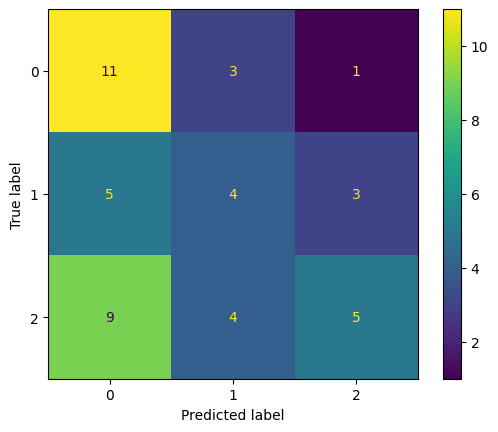

In [19]:
#homework
#KNN(Xpca(1+2))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca[:, 1:3],y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
#confusion_matrix(,)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

In [20]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset

#αυτά είπε να αντιγράψω για να κάνω την άσκηση για το σπίτι:

#X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split()

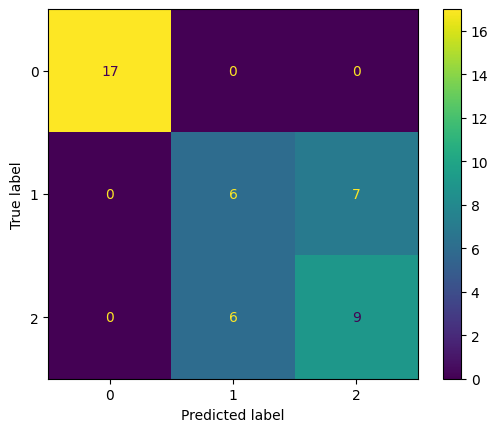

In [21]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
X_trainWrong, X_testWrong, y_trainWrong, y_testWrong = train_test_split(Xpp[:,0:2],y,test_size=0.3)
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_trainWrong,y_trainWrong)
YpredWrong=knn1.predict(X_testWrong)

#import and show confusion matrix
confusion_matrix(y_testWrong,YpredWrong)
ConfusionMatrixDisplay.from_predictions(y_testWrong,YpredWrong)
